In [2]:
import pandas as pd
import numpy as np
from patsy import dmatrix
from numpy.linalg import inv
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
health_df = pd.read_csv('Health_Data.csv')
health_df.head()

,age,income,illness,reduced,health
0,0.19,0.55,1,4,1
1,0.19,0.45,1,2,1
2,0.19,0.90,3,0,0
3,0.19,0.15,1,0,0
4,0.19,0.45,2,5,1


#### 1A

In [4]:
X = health_df[['age', 'income', 'illness', 'reduced']]
y = health_df['health']

In [5]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [6]:
b0 = 0
b1 = 0 
b2 = 0
b3 = 0
b4 = 0
alpha = 0.1
num_iter = 10000

x1 = X['age'].values
x2 = X['income'].values
x3 = X['illness'].values
x4 = X['reduced'].values

n = len(y)

for i in range(num_iter):
    y_pred = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
    
    err = y - y_pred
    
    b0 = b0 + alpha*np.sum(err)/n
    
    b1 = b1 + alpha*np.sum(err*x1)/n
    b2 = b2 + alpha*np.sum(err*x2)/n
    b3 = b3 + alpha*np.sum(err*x3)/n
    b4 = b4 + alpha*np.sum(err*x4)/n
    
print(b0,b1,b2,b3,b4)

1.2175337186897872 -0.17273499897030747 -0.10539057012366455 0.6849093812779468 0.45714456103589757


#### 1B

In [7]:
from sklearn.linear_model import SGDRegressor

linmod = SGDRegressor()
linmod.fit(X,y)
print(linmod.intercept_, linmod.coef_)

[1.19856809] [-0.17661829 -0.10891681  0.70302722  0.41086993]


In [8]:
# Are A and B similar? Yes

#### 2A

In [9]:
feature_matrix = sm.add_constant(health_df[["age","income","illness","reduced"]], prepend=False)
# Fit and summarize OLS model
model = sm.OLS(y, feature_matrix)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.35e-220
Time:                        12:22:40   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.8436      0.138     -6.120      0.000      -1.114      -0.573
income        -0.2857      0.076     -3.777      0.000      -0.434      -0.137
illness        0.4949      0.020     24.442      0.000       0.455       0.535
reduced        0.1583      0.009     16.671      0.000       0.140       0.177
const          0.8819      0.087     10.168      0.000       0.712       1.052
==============================================================================
Omnibus:                     2321.918   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12281.302
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                       9.222   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2B

In [10]:
#No, the R-squared value is .179, so the x's overall are only explaining approximately 18% of the variance in health outcome.  

#### 2C

In [11]:
#No, based on the coefficients of these predictors, they are not significant predictors

#### 2D

In [12]:
#The illness variable is the best predictor of health score because it has the highest coefficient value 
# of all the variables (0.4949)

#### 2E

In [13]:
v = np.array([[2],[3]]).reshape(1,2)

In [14]:
res.resid

0      -0.692625
1      -0.404543
2      -1.949059
3      -1.173603
4      -1.374393
          ...   
5185   -0.539141
5186    0.717322
5187    0.006814
5188   -0.257493
5189   -0.203060
Length: 5190, dtype: float64

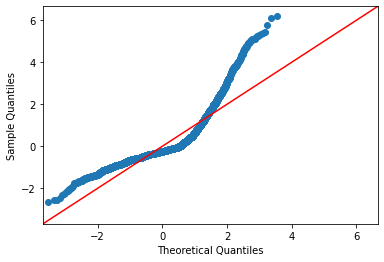

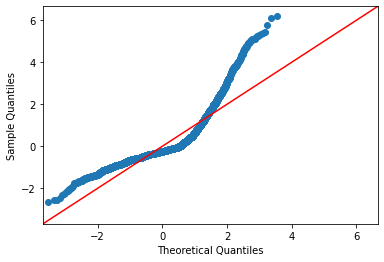

In [15]:
sm.qqplot(res.resid,fit=True,line='45')

In [16]:
# does it meet normality standard?
# No

#### 2F

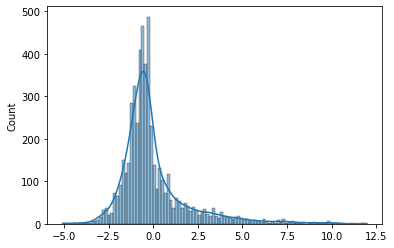

In [17]:
sns.histplot(res.resid, kde=True)
plt.show()

#still no, this is not a normal distribution, data is skewed right

#### 2G

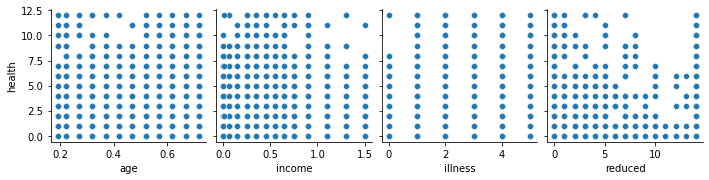

In [18]:
data = pd.read_csv("Health_Data.csv")
pp = sns.pairplot(data=data,
                  y_vars=['health'],
                  x_vars=['age', 'income', 'illness', 'reduced'])

#according to your plots, are the linearity assumptions met? 
# No

#### 2H

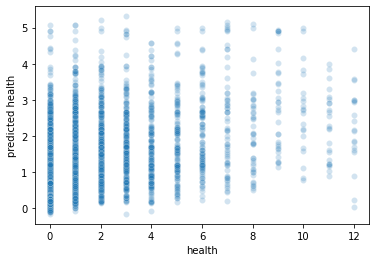

In [19]:
sns.scatterplot(x=data["health"], y=res.predict(), alpha=0.2)
plt.ylabel("predicted health")
plt.show()


#is your model good for predicting health scores?  
#no

#### 2I

In [20]:
X.cov()

#based on these values, there is not evidence of multicollinearity

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


#### 3A

In [21]:
# Post-Coma Recovery of IQ
recovery = pd.read_csv("Wong.csv")
recovery.head()

,Unnamed: 0,id,days,duration,sex,age,piq,viq
0,1,3358,30,4,Male,20.67077,87,89
1,2,3535,16,17,Male,55.28816,95,77
2,3,3547,40,1,Male,55.91513,95,116
3,4,3592,13,10,Male,61.66461,59,73
4,5,3728,19,6,Male,30.12731,67,73


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Drop the first column since it only contains the row number
recovery.drop('Unnamed: 0', axis=1, inplace=True)

# Check for missing values and remove any rows that contain them
recovery.dropna(inplace=True)

# Convert categorical variables to binary indicators using one-hot encoding
recovery = pd.get_dummies(recovery, columns=['sex'])

# Standardize the continuous variables
scaler = StandardScaler()
recovery[['age', 'days', 'age', 'piq', 'viq', 'duration']] = scaler.fit_transform(recovery[['age', 'days', 'age', 'piq', 'viq', 'duration']])

# Split the data into training and test sets - looking at verbal IQ post coma
X = recovery.drop('viq', axis=1)
y = recovery['viq']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the training and test data using mean squared error (MSE)
train_mse = mean_squared_error(y_train, reg.predict(X_train))
test_mse = mean_squared_error(y_test, reg.predict(X_test))

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)


Training MSE: 0.5310326684358313
Test MSE: 0.6129531319208074


#### 3B

In [23]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

#based on the accuracy scores for the training and test sets, there is not evidence of overfitting

0.44788032420205237
0.46497266743688226


#### 3C

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42, selection="random")
lasso.fit(X_train, y_train)
print(mean_squared_error(y_train, lasso.predict(X_train)), mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9547744273879925 1.1627572767640157
0.007312019310674489
-0.01493391877436645


#### 3D

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_train, ridge.predict(X_train)), mean_squared_error(y_test, ridge.predict(X_test)))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.531039529968823 0.6137928115469025
0.44787319020146066
0.4642397377442816


#### 3E

In [26]:
# OLS and ridge regression accuracy scores on the 
# training and test sets are nearly identical- the OLS scores are marginally better.

#### 3C

In [27]:
from sklearn.model_selection import GridSearchCV

lassotuner = GridSearchCV(Lasso(random_state=42, selection="random"), param_grid={"alpha": np.arange(1, 101)/100}, cv=8, n_jobs=-1)
lassotuner.fit(X_train, y_train)
print(lassotuner.best_params_, lassotuner.best_estimator_.score(X_train, y_train), lassotuner.best_estimator_.score(X_test, y_test))
ridgetuner = GridSearchCV(Ridge(random_state=42), param_grid={"alpha": np.arange(101)/100}, cv=8, n_jobs=-1)
ridgetuner.fit(X_train, y_train)
print(ridgetuner.best_params_, ridgetuner.best_estimator_.score(X_train, y_train), ridgetuner.best_estimator_.score(X_test, y_test))

{'alpha': 0.06} 0.43308893503981005 0.4347267750481223
{'alpha': 1.0} 0.44787319020146066 0.4642397377442816
